# Kaggle -  House Prices: Advanced Regression Techniques 

In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Data/train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

<AxesSubplot:>

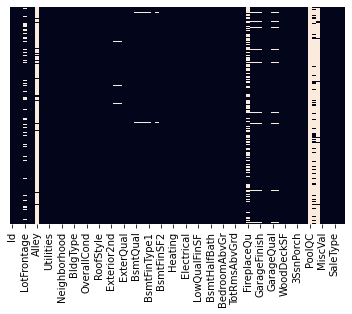

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocessing

## Train Data

#### Feature Types
- HouseStyle / BldgType - numeric or categoric, choice ! - Target encoding can be missleading - if all multistory houses are in a poor neighbourhood, size of house will appear to be -vely correlated with the price.
- MSSubClass - Looks numeric and ordinal, but its not !
- Year Built - Feature engineer (Age) - are older houses always cheap ?
- ExterQual / ExterCond - Numeric but dont look so - can do target encoding as an EDA, but this may give counter-inuitive results.
- Functional - My decision to keep numerical.
- MoSold

In [9]:
drop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

#### Imputation

- Logical NaNs: 'Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', 'FireplaceQu'
- Mode: 'Electrical'
- Median: 'LotFrontage', 'MasVnrArea'
- Mean: 'GarageYrBlt'
- Drop: PoolQC
Other techiniqes: Knn imputation, -- see if it increases baseline model's accuracy

In [10]:
## Handling logical NaNs

#categorical
logical_nans_cat = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType']
#Cat-to-Con
logical_nans_cattocon = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 
                'ExterQual', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'GarageQual', 
                'GarageCond', 'KitchenQual', 'ExterCond', 'BsmtExposure', 'Functional']

for col in logical_nans_cat:
    df[col] = df[col].fillna('NA')
for col in logical_nans_cattocon:
    df[col] = df[col].fillna('NA')

In [11]:
## Cat to Con conversion

grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
        'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
grp2 = ['BsmtFinType1', 'BsmtFinType2']

for col in grp1:
    df[col] = df[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})    
for col in grp2:
    df[col] = df[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

df['BsmtExposure'] = df['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
df['Functional'] = df['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0, 'NA':0})
df['GarageFinish'] = df['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

In [12]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [13]:
## Drop columns

df.drop(['Id'],axis=1,inplace=True)
df.drop(['PoolQC'],axis=1,inplace=True)

In [14]:
## Columns for OHE

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType', 'SaleCondition','Foundation',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','CentralAir',
         'Electrical','GarageType','PavedDrive', 'Alley', 'Fence', 'MiscFeature']

In [15]:
len(columns)

28

In [16]:
df.shape

(1460, 79)

<AxesSubplot:>

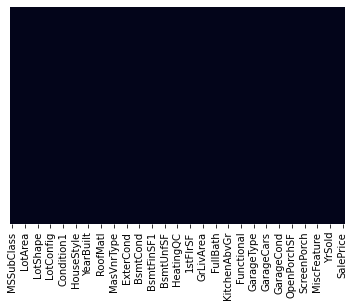

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Test Data

In [18]:
test_df=pd.read_csv('Data/test.csv')

In [19]:
test_df.shape

(1459, 80)

In [20]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
test_df.shape

(1459, 80)

<AxesSubplot:>

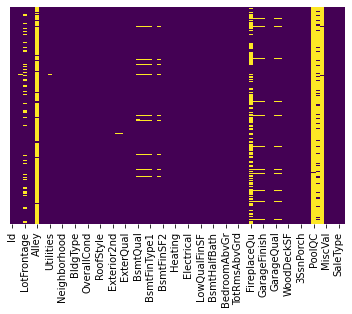

In [22]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
## Fill Missing Values

test_df['LotFrontage']=test_df['LotFrontage'].fillna(df['LotFrontage'].mean())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
test_df['MSZoning']=test_df['MSZoning'].fillna(df['MSZoning'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(df['SaleType'].mode()[0])

In [24]:
## Handling logical NaNs

for col in logical_nans_cat:
    test_df[col] = test_df[col].fillna('NA')
for col in logical_nans_cattocon:
    test_df[col] = test_df[col].fillna('NA')

In [25]:
## Cat to Con conversion

grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
        'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
grp2 = ['BsmtFinType1', 'BsmtFinType2']

for col in grp1:
    test_df[col] = test_df[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})
for col in grp2:
    test_df[col] = test_df[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

test_df['BsmtExposure'] = test_df['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
test_df['Functional'] = test_df['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0, 'NA':0})
test_df['GarageFinish'] = test_df['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

In [26]:
## Drop columns

test_df.drop(['Id'],axis=1,inplace=True)
test_df.drop(['PoolQC'],axis=1,inplace=True)

<AxesSubplot:>

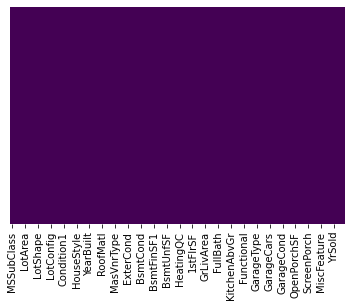

In [27]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
test_df.shape

(1459, 78)

In [29]:
final_df=pd.concat([df,test_df],axis=0)

In [30]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [31]:
final_df.shape

(2919, 79)

<AxesSubplot:>

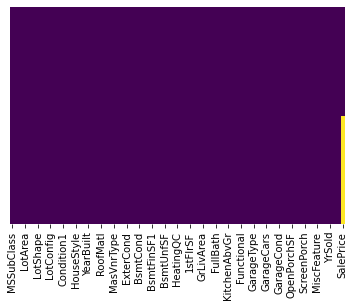

In [32]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields], prefix=fields, drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [34]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
Foundation
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
CentralAir
Electrical
GarageType
PavedDrive
Alley
Fence
MiscFeature


In [35]:
final_df.shape

(2919, 210)

<AxesSubplot:>

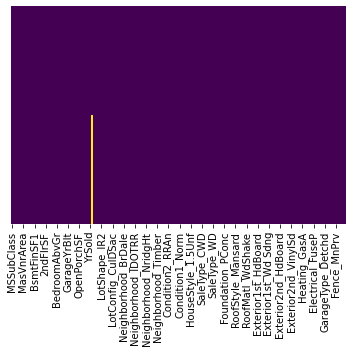

In [36]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [38]:
final_df.shape

(2919, 210)

## Splitting data

In [39]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [40]:
df_Train.shape

(1460, 210)

<AxesSubplot:>

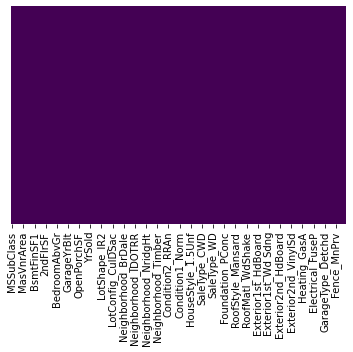

In [41]:
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/tmp/ipykernel_391674/3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [43]:
df_Test.shape

(1459, 209)

<AxesSubplot:>

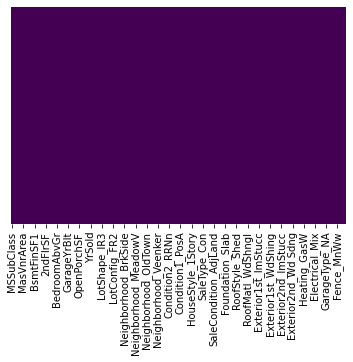

In [44]:
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
X=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

## Visualization and Clustering

In [46]:
from sklearn.preprocessing import StandardScaler

ds_Train = df_Train.drop(['SalePrice'],axis=1)
scaler = StandardScaler()
dst_scaled = scaler.fit_transform(ds_Train)

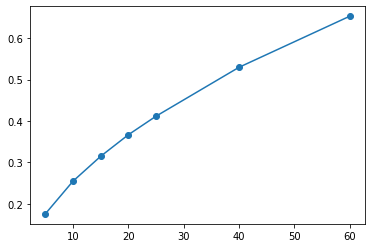

In [47]:
from sklearn.decomposition import PCA

cs = [5, 10, 15, 20, 25, 40, 60]
info = []
for i in cs:
    pca = PCA(n_components=i)
    vis = pca.fit_transform(dst_scaled)
    info.append(pca.explained_variance_ratio_.sum())
    
plt.plot(cs, info, '-o')

In [48]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

pca = PCA(n_components=40)

Xpca = pca.fit_transform(dst_scaled)
y = df_Train['SalePrice']

kf = KFold(n_splits=5)

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred))

887261262.51289


### visualisation

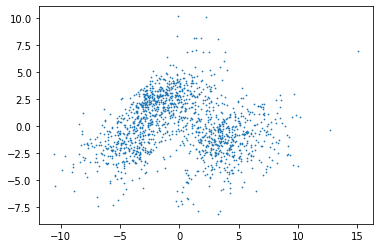

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vis = pca.fit_transform(dst_scaled)
plt.scatter(vis[:,0], vis[:,1], s=0.5)

/home/sreenath/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sreenath/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


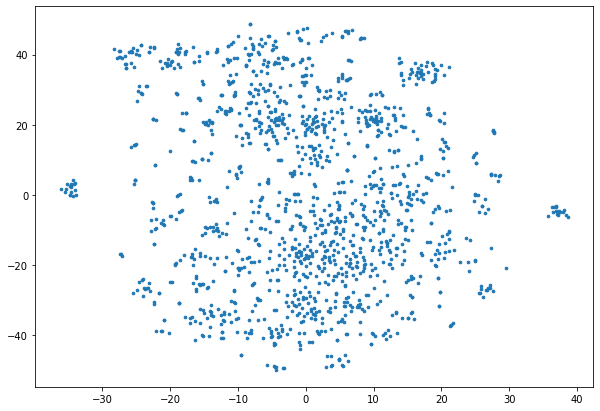

In [50]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,7))
pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(dst_scaled)
plt.scatter(vis[:,0], vis[:,1], s=7)

### Outlier Detection and removal

- A: isolation forest, B: Elliptic Envelope, C: LOF

In [51]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

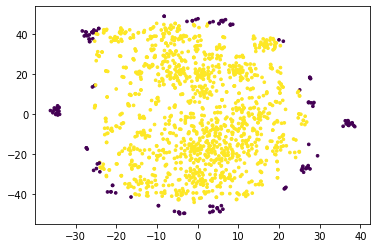

In [52]:
is_outlier = IsolationForest(contamination = 0.1, random_state=0, n_estimators=1000).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

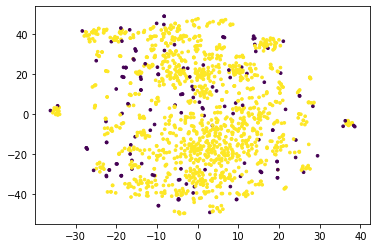

In [53]:
is_outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.1).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

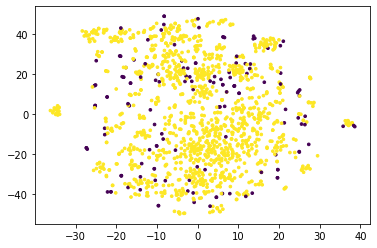

In [54]:
is_outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.1).fit_predict(dst_scaled)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

dataframe for outlier detection - scaled, after_tsne

### Clustering

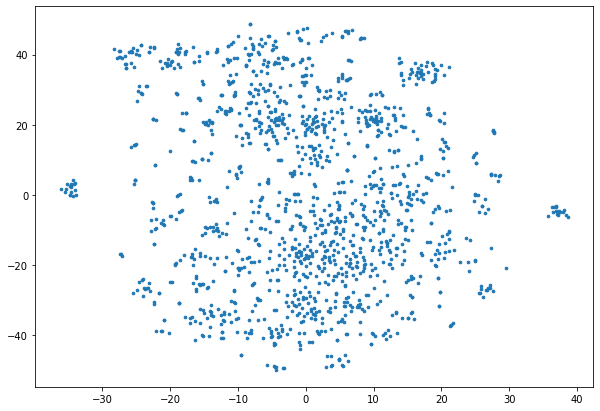

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=7)

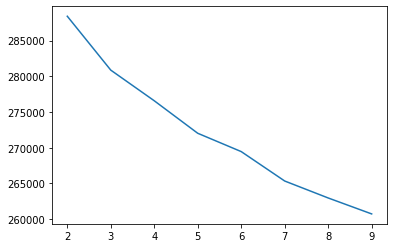

In [56]:
from sklearn.cluster import KMeans

elbow = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dst_scaled)
    elbow.append(kmeans.inertia_)
    
plt.plot(range(2,10), elbow)

> Inconclusive: Now what to do any ideas?

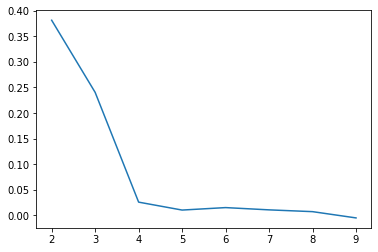

In [59]:
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds_Train)
    elbow.append(silhouette_score(dst_scaled, kmeans.labels_))
    
plt.plot(range(2,10), elbow)

> This is why we learnt multiple metrics to do the same thing. They help us decide in confusing situations

Visually, I was inclined towards 3-4 clusters, this helps me decide that a better choice is 4

**Question**
- Should I use original features for clustering or the components returned by TSNE ?

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(dst_scaled)

KMeans(n_clusters=4)

In [61]:
ds_Train['cluster'] = kmeans.labels_
ds_Train['SalePrice'] = df_Train['SalePrice']

In [62]:
#seperate traing for clusters
X1 = dst_scaled[ds_Train['cluster']==0]
X2 = dst_scaled[ds_Train['cluster']==1]
X3 = dst_scaled[ds_Train['cluster']==2]
X4 = dst_scaled[ds_Train['cluster']==3]

In [63]:
y1 = ds_Train[ds_Train['cluster']==0]['SalePrice'].values
y2 = ds_Train[ds_Train['cluster']==1]['SalePrice'].values
y3 = ds_Train[ds_Train['cluster']==2]['SalePrice'].values
y4 = ds_Train[ds_Train['cluster']==3]['SalePrice'].values

## Prediciton and selecting the Algorithm

In [64]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.8/dist-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [65]:
regressor=xgboost.XGBRegressor()

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [66]:
models = []
def save_model(X, y):
    regressor=xgboost.XGBRegressor()
    # Set up the random search with 4-fold cross validation
    random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
    random_cv.fit(X,y)
    regressor = random_cv.best_estimator_
    regressor.fit(X,y)
    models.append(regressor)

In [67]:
save_model(X1, y1)
save_model(X2, y2)
save_model(X3, y3)
save_model(X4, y4)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-8526.799, test=-352160.076) total time=   2.8s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-8356.493, test=-86167.506) total time=   2.8s
[CV 4/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-295.067, test=-11722.980) total time=   5.7s
[CV 3/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-5.271, test=-14615.715) total time=  16.9s
[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-3.576, test=-12658.414) total time=  18.6s
[CV 3/5] END base_score=1, booster=gbtree, learning

[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-7782.731, test=-18653.151) total time=   2.9s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-256.906, test=-14798.420) total time=   4.8s
[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-7921.598, test=-43830.075) total time=   1.4s
[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-8602.710, test=-297482.976) total time=   1.1s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-0.727, test=-14768.667) total time=  18.7s
[CV 1/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimato

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-9289.087, test=-245796.150) total time=   0.2s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=1500;, score=(train=-0.027, test=-15524.810) total time=  31.1s
[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=1500;, score=(train=-7468.136, test=-26543.302) total time=   4.1s
[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=1500;, score=(train=-8526.797, test=-352160.040) total time=   3.7s
[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=1500;, score=(train=-7503.457, test=-138447.605) total time=   2.8s
[CV 3/5] END base_score=0.75, booster=gbli

[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-8553.758, test=-298611.140) total time=   2.6s
[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1500;, score=(train=-7830.638, test=-31278.212) total time=   3.5s
[CV 2/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1100;, score=(train=-0.679, test=-15708.839) total time=   8.4s
[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1100;, score=(train=-7487.822, test=-88337.734) total time=   2.1s
[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1100;, score=(train=-8553.755, test=-298609.855) total time=   2.1s
[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=5, min_child_weight=1, n_est

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-8606.272, test=-20632.165) total time=   0.2s
[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-8022.028, test=-54747.045) total time=   0.2s
[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-8374.810, test=-25764.270) total time=   0.2s
[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-8160.798, test=-21805.163) total time=   0.1s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100;, score=(train=-7932.157, test=-22262.821) total time=   0.1s
[CV 1/5] END base_score=1, booster=gbl

[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=2, n_estimators=1500;, score=(train=-0.026, test=-16853.734) total time=  20.5s
[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-6953.306, test=-56045.673) total time=   0.8s
[CV 5/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-6933.503, test=-22679.888) total time=   0.7s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-7715.239, test=-26518.828) total time=   0.1s
[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=500;, score=(train=-7117.273, test=-18163.515) total time=   0.6s
[CV 1/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_e

[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-5619.013, test=-62643.420) total time=   1.7s
[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-37.735, test=-14327.602) total time=   3.8s
[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-6485.992, test=-93833.589) total time=   0.9s
[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-6112.753, test=-115148.576) total time=   0.7s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-2.229, test=-17132.272) total time=  10.3s
[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimator

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=500;, score=(train=-6157.136, test=-158689.316) total time=   0.9s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-7167.306, test=-48386.411) total time=   0.2s
[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=500;, score=(train=-6389.551, test=-91482.785) total time=   0.7s
[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=500;, score=(train=-5707.725, test=-63836.682) total time=   0.6s
[CV 2/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=500;, score=(train=-1560.401, test=-14590.755) total time=   0.9s
[CV 5/5] END base_score=0.75, booster=gb

[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=500;, score=(train=-5886.952, test=-65855.695) total time=   0.8s
[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=500;, score=(train=-5499.649, test=-39079.201) total time=   0.6s
[CV 3/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=500;, score=(train=-1455.758, test=-12449.286) total time=   0.9s
[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-7981.355, test=-71977.194) total time=   0.2s
[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100;, score=(train=-7944.166, test=-99759.646) total time=   0.1s
[CV 3/5] END base_score=0.25, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=4, 

[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100;, score=(train=-18335.822, test=-90623.400) total time=   0.1s
[CV 1/5] END base_score=1, booster=gbtree, learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=1500;, score=(train=-1.480, test=-32906.569) total time=   2.1s
[CV 4/5] END base_score=1, booster=gbtree, learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=1500;, score=(train=-0.898, test=-36618.002) total time=   2.1s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-11.468, test=-49125.461) total time=   2.3s
[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=900;, score=(train=-824.946, test=-45969.215) total time=   1.0s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=900;, score=(tr

In [68]:
ds_test_scaled = scaler.transform(df_Test)

In [69]:
df_Test['cluster'] = kmeans.predict(ds_test_scaled)

/tmp/ipykernel_391674/3060327580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test['cluster'] = kmeans.predict(ds_test_scaled)


In [70]:
def predict_op(arr):
    for i in range(4):
        np.put(arr, df_Test[df_Test['cluster']==i].index, models[i].predict(ds_test_scaled[df_Test['cluster']==i]))

In [71]:
arr = np.zeros(1459)
predict_op(arr)
arr

array([125660.4296875, 156681.       , 194099.125    , ...,
       161701.53125  , 101904.       , 246180.359375 ])

In [72]:
# arr = models[0].predict(df_Test)

In [73]:
def store_op(arr):
    sample = pd.read_csv('Data/sample_submission.csv')
    submission = sample.copy()
    submission['SalePrice'] = arr
    submission.to_csv('submission_1.csv', index=False)
    op = pd.read_csv('submission_1.csv')
    return op

In [74]:
op = store_op(arr)
op

,Id,SalePrice
0,1461,125660.429688
1,1462,156681.000000
2,1463,194099.125000
3,1464,196197.546875
4,1465,202142.125000
...,...,...
1454,2915,81382.156250
1455,2916,87181.132812
1456,2917,161701.531250
1457,2918,101904.000000
